<a href="https://colab.research.google.com/github/dixitritik17/ritik/blob/master/COVID19Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://cb.lk/covid_19

--2021-01-12 07:51:20--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2021-01-12 07:51:21--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-01-12 07:51:22--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-01-12 07:51:22--  https://www.dropbox.com/s/raw/7

In [ ]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [ ]:
train_path = "CovidDataset/train"
val_path = "CovidDataset/test"

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import keras
from keras.layers import*
from keras.models import*
from keras.preprocessing import image 
from keras.layers.normalization import BatchNormalization



In [ ]:
model = Sequential()
inputSize = (224,224,3)
model.add(Conv2D(32, (3, 3), activation="relu",input_shape=inputSize))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3) ,activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3) ,activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='Adam', metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 64)       

In [ ]:
train_datagen = image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = image.ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('CovidDataset/Train',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='binary')


Found 224 images belonging to 2 classes.


In [ ]:
validation_set = train_datagen.flow_from_directory('CovidDataset/Val',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='binary')


Found 60 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
                                training_set,
                                steps_per_epoch=6,
                                epochs=10,
                                validation_data= validation_set,
                                validation_steps=2
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
6/6 [==============================] - 17s 2s/step - loss: 1.7955 - accuracy: 0.5041 - val_loss: 0.6893 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 9s 2s/step - loss: 0.6675 - accuracy: 0.5966 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 3/10
6/6 [==============================] - 9s 2s/step - loss: 0.6804 - accuracy: 0.6528 - val_loss: 0.6791 - val_accuracy: 0.8000
Epoch 4/10
6/6 [==============================] - 9s 2s/step - loss: 0.6381 - accuracy: 0.6999 - val_loss: 0.5294 - val_accuracy: 0.8500
Epoch 5/10
6/6 [==============================] - 9s 2s/step - loss: 0.4762 - accuracy: 0.7590 - val_loss: 0.4404 - val_accuracy: 0.9000
Epoch 6/10
6/6 [==============================] - 9s 2s/step - loss: 0.4819 - accuracy: 0.7913 - val_loss: 0.3553 - val_accuracy: 0.8500
Epoch 7/10
6/6 [==============================] - 9s 2s/step - loss: 0.4125 - accuracy: 0.7759 - val_loss: 0.2629 - val_accuracy: 0.9333
Epoch 8/10
6/6 [========================

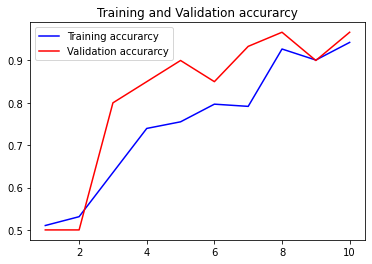

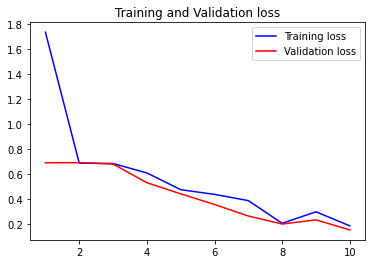

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()
